# IEOR 4703 -- Monte Carlo Simulation for FE

### Composition Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
from scipy.stats import norm
from scipy.stats import expon

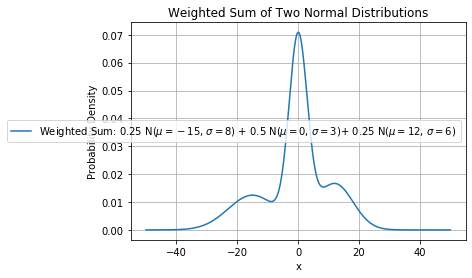

In [2]:
# Define the parameters for the three normal distributions
mu1, sigma1, weight1 = -15, 8, 0.25
mu2, sigma2, weight2 =  0, 3, 0.5
mu3, sigma3, weight3 =  12, 6, 0.25

# Create a range of x values
x = np.linspace(-50, 50, 1000)

# Compute the PDFs of the three normal distributions
pdf1 = norm.pdf(x, mu1, sigma1)
pdf2 = norm.pdf(x, mu2, sigma2)
pdf3 = norm.pdf(x, mu3, sigma3)

# Compute the weighted sum
weighted_pdf = weight1 * pdf1 + weight2 * pdf2 + weight3 * pdf3

# Plot the weighted sum
plt.plot(x, weighted_pdf, label=f'Weighted Sum: {weight1} N($\\mu={mu1}$, $\\sigma={sigma1}$) + {weight2} N($\\mu={mu2}$, $\\sigma={sigma2}$)+ {weight3} N($\\mu={mu3}$, $\\sigma={sigma3}$)')
plt.title(f'Weighted Sum of Two Normal Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [7]:
n = 50000
z1 = np.zeros(n)

np.random.seed(563456)
u = np.random.rand(n)
z = np.random.normal(0, 1, n)

for i in range(n):
    if u[i] < weight1:
        z1[i] = mu1 + sigma1*z[i]
    elif u[i] < weight1+weight2:
        z1[i] = mu2 + sigma2*z[i]
    else:
        z1[i] = mu3 + sigma3*z[i]

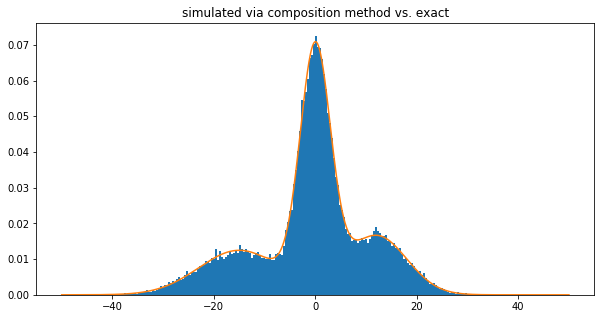

In [8]:
plt.figure(figsize=[10,5])
plt.hist(z1, density=True, bins=200)
plt.plot(x, weighted_pdf)
plt.title('simulated via composition method vs. exact')
plt.show()